# Exercise 9: Sound and music description

With this exercise you will learn to describe sounds with simple machine learning methods. You will learn to use the Freesound API to load pre-computed sound descriptors from Freesound and to perform sound clustering and classification with them. You will work with instrumental sounds, thus learning what audio features are useful for characterizing them.

There are four parts in this exercise: 1) Download sounds and descriptors from Freesound, 2) Select two descriptors for a good sound clustering, 3) Cluster sounds using k-means, and 4) Classify sounds using k-NN.

We provide the code for each task, thus no need to get involved in much programming. 

### Relevant Concepts

#### Freesound API
With the Freesound API you can browse, search, and retrieve information from Freesound, such as automatically extracted features from audio files. You can also perform advanced queries combining content analysis features and other metadata (tags, etc...). With the API you can do text searches similar to what you can do from the advanced searches in the website http://freesound.org/search/?q, but implementing the queries in software. If you are interested in knowing more about the Freesound API, you can see examples of using it with python in: https://github.com/MTG/freesound-python/blob/master/examples.py and you can read the API documentation, http://www.freesound.org/docs/api/

#### Sound descriptors
In this exercise, you will use sound descriptors that have been pre-computed with Essentia, https://essentia.upf.edu and are stored in the Freesound database together with the corresponding sounds. Many sound descriptors can be extracted using Essentia (http://essentia.upf.edu/documentation/algorithms_reference.html) and in Freesound, a number of them are used. In the Freesound API documentation there is specifc information of the descriptors available in Freesound, https://freesound.org/docs/api/analysis_index.html.

### Euclidian distance
The Euclidian distance is the straight-line distance between two points in an n-dimensional space, thus the distance between points $p$ and $q$ is the length of the line segment connecting them. If $p = (p_1, p_2,..., p_n)$ and $q = (q_1, q_2,..., q_n)$ are two points in Euclidean n-space, then the distance, $d$, from $p$ to $q$, or from $q$ to $p$ is given by the Pythagorean formula:

$ d(p,q) = \sqrt{\sum^n_{i=1} (q_i - p_i)^2} $


### K-means clustering (k-means)
K-means clustering is a method of vector quantization that is popular for cluster analysis in data mining. K-means clustering aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. The problem is computationally difficult (NP-hard), however, efficient heuristic algorithms converge quickly to a local optimum. 

Given a set of observations $(x_1, x_2, …, x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k (≤ n)$ sets $S = {S_1, S_2, …, S_k}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$\underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^{k} \sum_{\mathbf x \in S_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2 = \underset{\mathbf{S}} {\operatorname{arg\,min}}  \sum_{i=1}^k |S_i| \operatorname{Var} S_i$, where $μ_i$ is the mean of points in $S_i$.


### K-nearest neighbours classifier (k-NN)
K-nearest neighbours classification (k-NN) is a non-parametric method in which the input consists of the $k$ closest training examples in the feature space. The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small). If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.


## Part 1: Download sounds and descriptors from Freesound

Download a collection of instrumental sounds and their descriptors from Freesound using the Freesound API.

First get a Freesound API key from http://www.freesound.org/apiv2/apply/ and create a directory in the workspace with the name `testDownload` to store the sounds and descriptors. You also need to install the python client for the freesound API. Do this by cloning the repository https://github.com/MTG/freesound-python, into a folder and installing it following the instructions. You will have to import the freesound module in the code.

You will be calling the function `download_sounds_freesound()` whose input parameters are:
1. `queryText` (string): A single word or a string of words without spaces (use hyphens), typically the name of the instrument. e.g. (eg. "violin", "trumpet", "cello", "bassoon", etc.)
2. `tag` (string): tag to be used for filtering the searched sounds (e.g., "multisample", "single-note", "velocity", "tenuto", etc.).
3. `duration` (2 floating point numbers): min and max duration (seconds) of the sound to filter, e.g., (0.2,15).
4. `API_Key` (string): your API key.
5. `outputDir` (string): path to the directory where you want to store the sounds and their descriptors.
6. `topNResults` (integer): number of results (sounds) that you want to download.
7. `featureExt` (file extension): file extension for storing sound descriptor (.json, typically).

In the call to `download_sounds_freesound()` you will have to choose the appropriate queryText, tag, and duration, to return single notes/strokes of instrumental sounds. The first twenty results of the query should be "good". Note that the tag can be empty. Example of a query to obtain single notes of violin could be: `download_sounds_freesound(queryText='violin', API_Key=<your key>, outputDir='testDownload/', topNResults=20, duration=(0,8.5), tag='single-note')`. This returns 20 single notes of violin sounds and the script stores them in the `testDownload` directory (the directory has to be created beforehand).

Download and store twenty sound examples of each instrument using the `download_sounds_freesound()` function given below. The examples need to be representative of the instrument and coherent, single notes (melodic instruments) or single strokes (percussion instruments), and shorter than 10 seconds. Specify a good query text, tag, and duration to query for the chosen instruments. Refine your search parameters until you get twenty adequate samples for each instrument. Select three instruments to be used out of this set: violin, guitar, bassoon, trumpet, clarinet, cello, naobo (cymbals used in Beijing Opera). Listen to the sounds downloaded and look at the descriptor .json files.

Before using the API to download the sounds, we recommend to do the same query using the Freesound website and checking that the top 20 results are good.

In [1]:
import os, sys
import json
import freesound as fs

descriptors = [ 'lowlevel.spectral_centroid.mean',
                'lowlevel.spectral_contrast.mean',
                'lowlevel.dissonance.mean',
                'lowlevel.hfc.mean',
                'lowlevel.mfcc.mean',
                'sfx.logattacktime.mean',
                'sfx.inharmonicity.mean']

  

In [2]:
def download_sounds_freesound(queryText = "", tag=None, duration=None, API_Key = "", outputDir = "", topNResults = 5, featureExt = '.json'):
  """
  This function downloads sounds and their descriptors from freesound using the queryText and the 
  tag specified in the input. Additionally, you can also specify the duration range to filter sounds 
  based on duration.
  
  Inputs:
        (Input parameters marked with a * are optional)
        queryText (string): query text for the sounds (eg. "violin", "trumpet", "cello", "bassoon" etc.)
        tag* (string): tag to be used for filtering the searched sounds. (eg. "multisample",  
                       "single-note" etc.)
        duration* (tuple): min and the max duration (seconds) of the sound to filter, eg. (0.2,15)
        API_Key (string): your api key, which you can obtain from : www.freesound.org/apiv2/apply/
        outputDir (string): path to the directory where you want to store the sounds and their 
                            descriptors
        topNResults (integer): number of results(sounds) that you want to download 
        featureExt (string): file extension for storing sound descriptors
  output:
        This function downloads sounds and descriptors, and then stores them in outputDir. In 
        outputDir it creates a directory of the same name as that of the queryText. In this 
        directory outputDir/queryText it creates a directory for every sound with the name 
        of the directory as the sound id. Additionally, this function also dumps a text file 
        containing sound-ids and freesound links for all the downloaded sounds in the outputDir. 
        NOTE: If the directory outputDir/queryText exists, it deletes the existing contents 
        and stores only the sounds from the current query. 
  """ 
  
  # Checking for the compulsory input parameters
  if queryText == "":
    print("\n")
    print("Provide a query text to search for sounds")
    return -1
    
  if API_Key == "":
    print("\n")
    print("You need a valid freesound API key to be able to download sounds.")
    print("Please apply for one here: www.freesound.org/apiv2/apply/")
    print("\n")
    return -1
    
  if outputDir == "" or not os.path.exists(outputDir):
    print("\n")
    print("Please provide a valid output directory. This will be the root directory for storing sounds and descriptors")
    return -1    
  
  # Setting up the Freesound client and the authentication key
  fsClnt = fs.FreesoundClient()
  fsClnt.set_token(API_Key)  
  #fsClnt.set_token(API_Key,"token")
  
  # Creating a duration filter string that the Freesound API understands
  if duration and type(duration) == tuple:
    flt_dur = " duration:[" + str(duration[0])+ " TO " +str(duration[1]) + "]"
  else:
    flt_dur = ""
 
  if tag and type(tag) == str:
    flt_tag = "tag:"+tag
  else:
    flt_tag = ""

  # Querying Freesound
  page_size = 30
  if not flt_tag + flt_dur == "":
    qRes = fsClnt.text_search(query=queryText ,filter = flt_tag + flt_dur,sort="score", fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  else:
    qRes = fsClnt.text_search(query=queryText ,sort="score",fields="id,name,previews,username,url,analysis", descriptors=','.join(descriptors), page_size=page_size, normalized=1)
  
  outDir2 = os.path.join(outputDir, queryText)
  if os.path.exists(outDir2):             # If the directory exists, it deletes it and starts fresh
      os.system("rm -r " + outDir2)
  os.mkdir(outDir2)

  pageNo = 1
  sndCnt = 0
  indCnt = 0
  totalSnds = min(qRes.count,200)   # System quits after trying to download after 200 times
  
  # Creating directories to store output and downloading sounds and their descriptors
  downloadedSounds = []
  while(1):
    if indCnt >= totalSnds:
      print("Not able to download required number of sounds. Either there are not enough search results on freesound for your search query and filtering constraints or something is wrong with this script.")
      break
    sound = qRes[indCnt - ((pageNo-1)*page_size)]
    print("Downloading mp3 preview and descriptors for sound with id: %s"%str(sound.id))
    outDir1 = os.path.join(outputDir, queryText, str(sound.id))
    if os.path.exists(outDir1):
      os.system("rm -r " + outDir1)
    os.system("mkdir " + outDir1)
    
    mp3Path = os.path.join(outDir1,  str(sound.previews.preview_lq_mp3.split("/")[-1]))
    ftrPath = mp3Path.replace('.mp3', featureExt)
    
    try:
      
      fs.FSRequest.retrieve(sound.previews.preview_lq_mp3, fsClnt, mp3Path)
      # Initialize a dictionary to store descriptors
      features = {}
      # Obtaining all the descriptors
      for desc in descriptors:
        features[desc]=[]
        features[desc].append(eval("sound.analysis."+desc))
      
      # Once we have all the descriptors, store them in a json file
      json.dump(features, open(ftrPath,'w'))
      sndCnt+=1
      downloadedSounds.append([str(sound.id), sound.url])

    except:
      if os.path.exists(outDir1):
        os.system("rm -r " + outDir1)
    
    indCnt +=1
    
    if indCnt%page_size==0:
      qRes = qRes.next_page()
      pageNo+=1
      
    if sndCnt>=topNResults:
      break
  # Dump the list of files and Freesound links
  fid = open(os.path.join(outDir2, queryText+'_SoundList.txt'), 'w')
  for elem in downloadedSounds:
    fid.write('\t'.join(elem)+'\n')
  fid.close()

In [3]:
import time
import requests

def download_sounds_freesound_new(queryText="", tag=None, duration=None, API_Key="", 
                              outputDir="", topNResults=5, featureExt='.json'):
    """
    This function downloads sounds and their descriptors from freesound using direct HTTP requests.
    This bypasses issues with the freesound-python library.
    """
    
    # Validate inputs
    if not queryText:
        print("\nProvide a query text to search for sounds")
        return -1
    
    if not API_Key:
        print("\nYou need a valid freesound API key.")
        print("Please apply for one here: www.freesound.org/apiv2/apply/")
        return -1
    
    if not outputDir or not os.path.exists(outputDir):
        print("\nPlease provide a valid output directory.")
        return -1
    
    # Descriptors to fetch
    descriptors = [
        'lowlevel.spectral_centroid.mean',
        'lowlevel.spectral_contrast.mean', 
        'lowlevel.dissonance.mean',
        'lowlevel.hfc.mean',
        'lowlevel.mfcc.mean',
        'sfx.logattacktime.mean',
        'sfx.inharmonicity.mean'
    ]
    
    print(f"Searching for: {queryText}")
    
    # Build the search URL
    base_url = "https://freesound.org/apiv2/search/text/"
    headers = {"Authorization": f"Token {API_Key}"}
    
    # Build filter string
    filters = []
    if duration and isinstance(duration, tuple):
        filters.append(f"duration:[{duration[0]} TO {duration[1]}]")
    if tag:
        filters.append(f"tag:{tag}")
    
    filter_str = " ".join(filters) if filters else None
    
    # Search parameters
    params = {
        "query": queryText,
        "fields": "id,name,previews,url",
        "page_size": 30,
        "sort": "score"
    }
    
    if filter_str:
        params["filter"] = filter_str
    
    # Make the search request
    print("Searching Freesound...")
    try:
        response = requests.get(base_url, headers=headers, params=params)
        response.raise_for_status()
        data = response.json()
    except Exception as e:
        print(f"Search failed: {e}")
        return -1
    
    results = data.get("results", [])
    count = data.get("count", 0)
    
    print(f"Found {count} sounds")
    
    if not results:
        print("No sounds found")
        return -1
    
    # Create output directory
    outDir2 = os.path.join(outputDir, queryText)
    if os.path.exists(outDir2):
        os.system(f"rm -r \"{outDir2}\"")
    os.mkdir(outDir2)
    
    downloadedSounds = []
    sndCnt = 0
    indCnt = 0
    
    print(f"Downloading up to {topNResults} sounds...")
    
    # Download sounds
    while sndCnt < topNResults and indCnt < len(results):
        sound = results[indCnt]
        sound_id = sound["id"]
        sound_name = sound["name"]
        
        print(f"Downloading sound {sound_id}: {sound_name}")
        
        # Create sound directory
        outDir1 = os.path.join(outDir2, str(sound_id))
        if os.path.exists(outDir1):
            os.system(f"rm -r \"{outDir1}\"")
        os.mkdir(outDir1)
        
        try:
            # Get preview URL
            preview_url = sound["previews"]["preview-lq-mp3"]
            mp3_filename = preview_url.split("/")[-1]
            mp3Path = os.path.join(outDir1, mp3_filename)
            
            # Download MP3 (previews don't need authentication)
            print(f"  Downloading MP3...")
            mp3_response = requests.get(preview_url)
            mp3_response.raise_for_status()
            
            with open(mp3Path, 'wb') as f:
                f.write(mp3_response.content)
            
            print(f"  MP3 downloaded ({len(mp3_response.content)} bytes)")
            
            # Get analysis
            print(f"  Fetching analysis...")
            analysis_url = f"https://freesound.org/apiv2/sounds/{sound_id}/"
            analysis_params = {
                "fields": "id,analysis",
                "descriptors": ",".join(descriptors),
                "normalized": 1
            }
            
            analysis_response = requests.get(
                analysis_url, 
                headers=headers, 
                params=analysis_params
            )
            analysis_response.raise_for_status()
            analysis_data = analysis_response.json()
            
            # Extract descriptors
            features = {}
            if "analysis" in analysis_data and analysis_data["analysis"]:
                for desc in descriptors:
                    try:
                        # Navigate through nested dictionary
                        parts = desc.split('.')
                        value = analysis_data["analysis"]
                        for part in parts:
                            value = value[part]
                        features[desc] = [value]
                    except (KeyError, TypeError):
                        features[desc] = [None]
                        print(f"  Warning: {desc} not available")
            else:
                print(f"  Warning: No analysis available")
                for desc in descriptors:
                    features[desc] = [None]
            
            # Save features
            ftrPath = mp3Path.replace('.mp3', featureExt)
            with open(ftrPath, 'w') as f:
                json.dump(features, f)
            
            print(f"  Analysis saved")
            
            sndCnt += 1
            downloadedSounds.append([str(sound_id), sound["url"]])
            
            # Rate limiting
            time.sleep(0.3)
            
        except Exception as e:
            print(f"  Failed: {e}")
            if os.path.exists(outDir1):
                os.system(f"rm -r \"{outDir1}\"")
        
        indCnt += 1
        
        # Get next page if needed
        if indCnt >= len(results) and sndCnt < topNResults and "next" in data:
            print("Fetching next page...")
            try:
                response = requests.get(data["next"], headers=headers)
                response.raise_for_status()
                data = response.json()
                results = data.get("results", [])
                indCnt = 0
            except Exception as e:
                print(f"Failed to get next page: {e}")
                break
    
    # Save sound list
    fid = open(os.path.join(outDir2, queryText+'_SoundList.txt'), 'w')
    for elem in downloadedSounds:
        fid.write('\t'.join(elem)+'\n')
    fid.close()
    
    print(f"\nDownloaded {sndCnt} sounds to {outDir2}")
    return sndCnt

In [4]:
#call download_sounds_freesound for 3 instruments with parameters to obtain adequate sounds
### your code here
API_Key = "lrWGbfkjLZviEhjNks5u5zSzEyefyoFAMEcye9Pk"
outputDir = "../testDownload"

download_sounds_freesound_new(
    queryText="clarinet",
    duration=(0.2, 9),
    tag='good-sounds',
    API_Key= API_Key,
    topNResults=20,
    outputDir="../testDownload"
)
download_sounds_freesound_new(
    queryText="violin",
    tag='good-sounds',
    duration=(0.2, 9),
    API_Key= API_Key,
    topNResults=20,
    outputDir="../testDownload"
)
download_sounds_freesound_new(
    queryText="bassoon",
    duration=(0.2, 9),
    API_Key= API_Key,
    topNResults=20,
    outputDir="../testDownload"
) 

### explain the coherence of the sound collections obtained 
#after searching in the freesound.org site I decided to use




Searching for: clarinet
Searching Freesound...
Found 1410 sounds
  MP3 downloaded (53736 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (45624 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (45648 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (44952 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (45912 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (45936 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (45864 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (44952 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (49392 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (49944 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (49992 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (46128 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downloaded (45576 bytes)
  Fetching analysis...
  Analysis saved
  MP3 downlo

20

Note: I had to change the function download_sounds_freesound and not use the freesound Python library, as it caused connection errors, probably related to the installed packages versions that I didn't manage to overcome in any other way. I rewrote the function to use the requests library, allowing for direct interaction with the Freesound API. I also replaced the eval() method for feature extraction with standard dictionary parsing and added rate limiting (time.sleep) to prevent server timeouts.

The new function download_sounds_freesound_new accepts the exact same inputs as the original function.

I chose to use clarinet, bassoon and violin. I found it interesting how clarinet and bassoon are in the both wind instruments, so it will be interesting to cluster them, while violin is a string instrument with different spectral properties.

For the query, since the limit was 10 seconds, I used as duration (0.2,9) so that the single note can be clear. After looking at freesound.org for tags, I decided to use 'good-sounds' tag for violin and clarinet, since they are high-quality, isolated, single-note recordings from the MTG. For bassoon I used none, since it had  very few results for the 'single-note' tag, which was the only suggested tag that matched our search. After listening to the results, they were clear and coherent for the assignment.


   

## Part 2: Select two descriptors for a good sound clustering

Select two of the sound descriptors obtained from Task 1 in order to obtain a good clustering of the sounds of three instruments in a two dimensional space. By visualizing the descriptor values of the sounds in a 2D plot you can choose the features that can help to better cluster these instruments. 

You take as inputs the downloaded sounds folder (`targetDir`) and the descriptor pair indices (`descInput`) (see mapping) to create a 2-D scatter plot of the descriptor pair. The data points, sounds, from different instruments are shown with different colors. In addition, you can also plot the Freesound ID of the sounds with the points. Only plot the sounds of the 3 instruments chosen. Make sure that in `targetDir` you only have the 3 instruments chosen.

Choose a good pair of descriptors for the sounds of the 3 instruments you downloaded in Part 1. A good pair of descriptors leads to a point distribution where all the sounds of an instrument cluster together, with a good separation from the other instrument clusters. Try out different combinations of descriptor pairs. Write a short paragraph on the descriptor pairs you tried out, justifying your choices for selecting those particular descriptors. Based on the spectral and temporal features of the instruments and sounds, give an explanation of why (or why not) a good clustering is (or is not) achieved with the chosen pairs of descriptors.

From the code given you can generate a 2-D scatter plot of all sounds for the chosen descriptor pairs. 

In [7]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.cluster.vq import vq, kmeans, whiten

# Mapping of descriptors
descriptorMapping = { 0: 'lowlevel.spectral_centroid.mean',
                      1: 'lowlevel.dissonance.mean',
                      2: 'lowlevel.hfc.mean',
                      3: 'sfx.logattacktime.mean',
                      4: 'sfx.inharmonicity.mean',
                      5: 'lowlevel.spectral_contrast.mean.0',
                      6: 'lowlevel.spectral_contrast.mean.1',
                      7: 'lowlevel.spectral_contrast.mean.2',
                      8: 'lowlevel.spectral_contrast.mean.3',
                      9: 'lowlevel.spectral_contrast.mean.4',
                      10: 'lowlevel.spectral_contrast.mean.5',
                      11: 'lowlevel.mfcc.mean.0',
                      12: 'lowlevel.mfcc.mean.1',
                      13: 'lowlevel.mfcc.mean.2',
                      14: 'lowlevel.mfcc.mean.3',
                      15: 'lowlevel.mfcc.mean.4',
                      16: 'lowlevel.mfcc.mean.5'
                    }

In [5]:
def convFtrDict2List(ftrDict):
  """
  This function converts descriptor dictionary to an np.array. The order in the numpy array (indices) 
  are same as those mentioned in descriptorMapping dictionary.
  
  Input: 
    ftrDict (dict): dictionary containing descriptors downloaded from the freesound
  Output: 
    ftr (np.ndarray): Numpy array containing the descriptors for processing later on
  """
  ftr = []
  for key in range(len(descriptorMapping.keys())):
    try:
      ftrName, ind = '.'.join(descriptorMapping[key].split('.')[:-1]), int(descriptorMapping[key].split('.')[-1])
      ftr.append(ftrDict[ftrName][0][ind])
    except:
      ftr.append(ftrDict[descriptorMapping[key]][0])
  return np.array(ftr)

""" def fetchDataDetails(inputDir, descExt = '.json'):

  dataDetails = {}
  for path, dname, fnames  in os.walk(inputDir):
    for fname in fnames:
      if descExt in fname.lower():
        #remain, rname, cname, sname = path.split('/')[:-3], path.split('/')[-3], path.split('/')[-2], path.split('/')[-1]
        remain, rname, cname, sname = path.split(os.sep)[:-3], path.split(os.sep)[-3], path.split(os.sep)[-2], path.split(os.sep)[-1]
        if cname not in dataDetails:
          dataDetails[cname]={}
        #fDict = json.load(open(os.path.join('/'.join(remain), rname, cname, sname, fname),'r'))
        fDict = json.load(open(os.path.join(path, fname),'r'))
        dataDetails[cname][sname]={'file': fname, 'feature':fDict}
  return dataDetails  """ 

def fetchDataDetails(inputDir, descExt = '.json'):
  dataDetails = {}
  for path, dname, fnames in os.walk(inputDir):
    for fname in fnames:
      if descExt in fname.lower():
        path_parts = path.split(os.sep)
        
        # Check if path has enough depth (at least 2 levels: instrument/soundID)
        if len(path_parts) >= 2:
          cname = path_parts[-2]  # instrument name
          sname = path_parts[-1]  # sound ID
          
          if cname not in dataDetails:
            dataDetails[cname] = {}
          
          fDict = json.load(open(os.path.join(path, fname), 'r'))
          dataDetails[cname][sname] = {'file': fname, 'feature': fDict}
  
  return dataDetails


'\n\n\n'

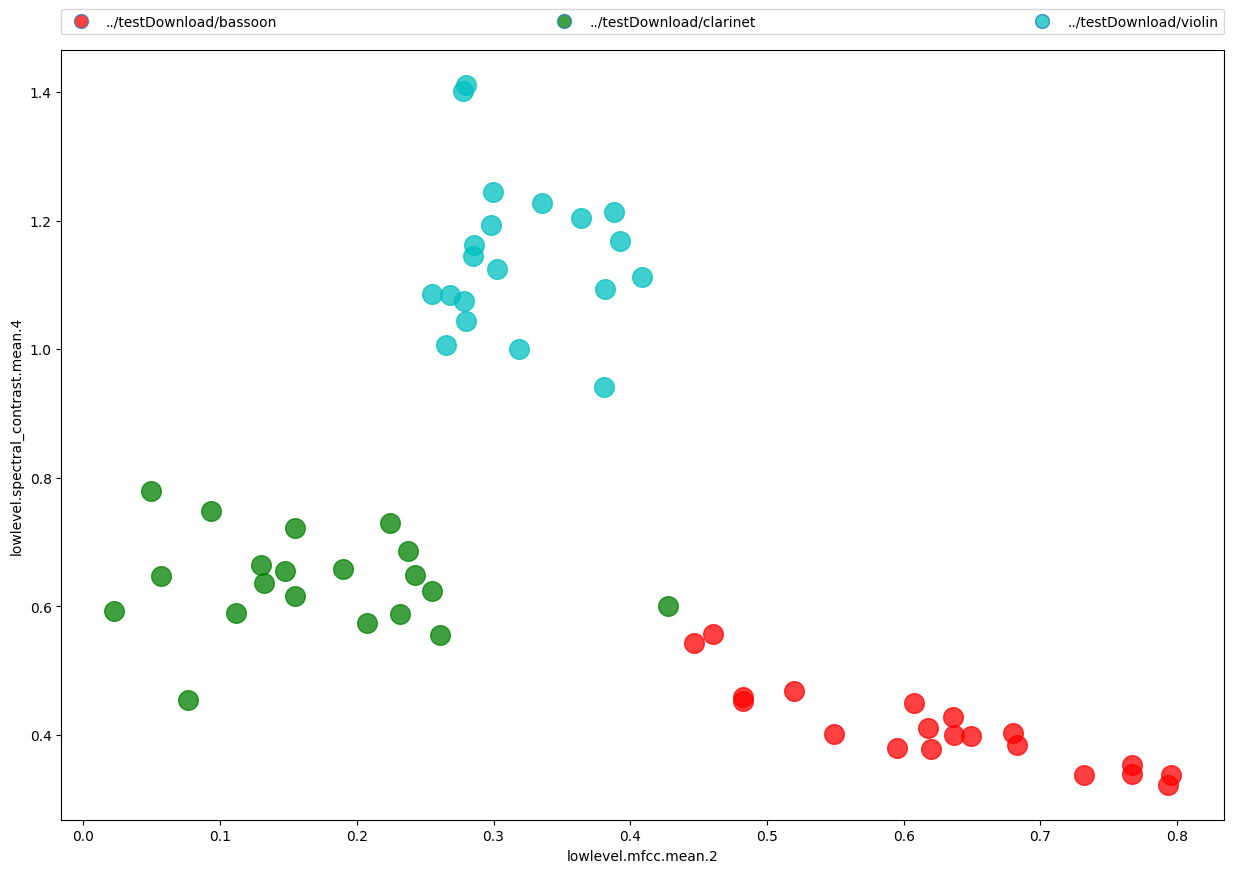

In [30]:
# 2.2: Select the descriptors to plot of the three instruments chosen
inputDir = "../testDownload/"

### this is the main line to modify, select two descriptors, change the XX by a number from 0 to 16

# (13,9) gives also good results
descInput = (13,9)


# no need to change the code from here
anotOn = 0
dataDetails = fetchDataDetails(inputDir)
colors = ['r', 'g', 'c', 'b', 'k', 'm', 'y']

plt.figure(figsize=(15, 10))

legArray = []
catArray = []
""" for ii, category in enumerate(dataDetails.keys()):
    catArray.append(category)
    for soundId in dataDetails[category].keys():
        filepath = os.path.join(inputDir, category, soundId, dataDetails[category][soundId]['file'])
        descSound = convFtrDict2List(json.load(open(filepath, 'r')))
        x_cord = descSound[descInput[0]]
        y_cord = descSound[descInput[1]]
        plt.scatter(x_cord, y_cord, c = colors[ii], s=200, alpha=0.75)
        if anotOn==1:
            plt.annotate(soundId, xy=(x_cord, y_cord), xytext=(x_cord, y_cord))
    circ = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor=colors[ii])
    legArray.append(circ) """
for ii, category in enumerate(dataDetails.keys()):
    catArray.append(category)
    for soundId in dataDetails[category].keys():
        # Use the feature dict that's already loaded in dataDetails
        descSound = convFtrDict2List(dataDetails[category][soundId]['feature'])
        x_cord = descSound[descInput[0]]
        y_cord = descSound[descInput[1]]
        plt.scatter(x_cord, y_cord, c = colors[ii], s=200, alpha=0.75)
        if anotOn==1:
            plt.annotate(soundId, xy=(x_cord, y_cord), xytext=(x_cord, y_cord))
    circ = Line2D([0], [0], linestyle="none", marker="o", alpha=0.75, markersize=10, markerfacecolor=colors[ii])
    legArray.append(circ)
  
plt.ylabel(descriptorMapping[descInput[1]])
plt.xlabel(descriptorMapping[descInput[0]])
plt.legend(legArray,catArray,numpoints=1,bbox_to_anchor=(0.,1.02,1.,.102),loc=3,ncol=len(catArray),mode="expand",borderaxespad=0.)

#### Explain the results
"""


"""

Descriptor 9 (Spectral contrast with mean 4) was able to cluster the violin from the wind instruments. Spectral contrast measures the differenece in energy between the peaks(highest values) and valleys(lowest values) within specific frequency bands. The primary focus is on the differenece or contrast between the most intense and least intense frequencies component within each band. The violin isolates itself on this axis, since the bowing of the string creates high-frequency noise and 'scratchiness', resulting in high spectral contrast in the upper bands. The Clarinet and Bassoon cluster together low on this axis, because wind instruments produce a smoother, less chaotic sound. I tried spectral contrast with different means as well, but this one gave the best results.

To seperate bassoon from clarinet, I chose descriptor 13 (MFCC with mean 2), which is the third Mel-Frequency Cepstral Coefficient and captures the broad spectral envelope of the instruments. This, out of all the MFCC descriptors, gave the best results. This is due to the physics of the instrument bore. The bassoon has a conical bore, so it produces a spectrum of both even and odd harmonics, while the clarinet has a cylindrical bore, so it supresses even harmonics and produces only odd harmonics, making their spectral shapes quite different.

However, we can see that one clarinet sample, was clustered with basoon, meaning that probably more descriptors are needed to get a better classification.

I also tried the combination of descriptor 13 with descriptor 0 (spectral centroid), which captures the instrument's brightness (high/low frequencies). This also gave good results but with less tight clusters.This is probably because the spectral centroid is highly dependent on the fundamental pitch.

 




## Part 3: Cluster sounds using k-means

After visualizing the sound descriptors, you will now cluster the sounds using more than two descriptors. You can use as many descriptors as you need for the best clustering. Use the same set of sounds obtain in Task 1, starting from the descriptors that you found were good in Part 2, and then adding other descriptors that you feel can improve the kmeans clustering of sounds. The function `cluster_sounds()` takes the sounds folder (targetDir), number of clusters (nCluster) and the descriptor indices (descInput) as input. It then performs a kmeans clustering using the selected descriptors. Make sure that in targetDir you only have the 3 instruments chosen.

For this part, you can use as many descriptors as you need to achieve good clustering and classification performance. However it is best to use as few descriptors as possible in order to make it easier to explain the contribution of each descriptor. Choose the number of clusters to be the same as the number of instruments (i.e., 3). Ideally in such a case, all the sounds of an instrument should go into a single cluster. In reality however, there might be sounds that are outliers and can go into a different cluster. The algorithm takes a majority vote on the sounds in each of the three clusters and assigns each cluster to an instrument. We compute the performance of the clustering by checking the number of points (sounds), that have been wrongly assigned to a cluster. The function clusterSounds() prints the clusters and the sounds assigned to each one. The function also prints the resulting classification obtained with the choice of descriptors you made.

Write a short paragraph explaining the descriptors you used, the resulting classification accuracy you obtained, and your observations on why you obtained (or not) those errors in clustering. Comment if you see any systematic errors (such as a consistent mix up of sounds from two instruments) and possible reasons for that. You should also try to cluster with different subsets of descriptors and mention the classification accuracy you obtain in each case.

Note: Since the cluster centers are randomly initialized every time in k-means, you might see different results every time you run the function. You can report the best result you obtained.

In [4]:
def cluster_sounds(targetDir, nCluster = -1, descInput=[]):
  """
  This function clusters all the sounds in targetDir using kmeans clustering.
  
  Input:
    targetDir (string): Directory where sound descriptors are stored (all the sounds in this 
                        directory will be used for clustering)
    nCluster (int): Number of clusters to be used for kmeans clustering.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance 
                       computation (see descriptorMapping)
  Output:
    Prints the class of each cluster (computed by a majority vote), number of sounds in each 
    cluster and information (sound-id, sound-class and classification decision) of the sounds 
    in each cluster. Optionally, you can uncomment the return statement to return the same data.
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  ftrArr = []
  infoArr = []
  
  if nCluster ==-1:
    nCluster = len(dataDetails.keys())
  for cname in dataDetails.keys():
    #iterating over sounds
    for sname in dataDetails[cname].keys():
      ftrArr.append(convFtrDict2List(dataDetails[cname][sname]['feature'])[descInput])
      infoArr.append([sname, cname])
  
  ftrArr = np.array(ftrArr)
  infoArr = np.array(infoArr)
  
  ftrArrWhite = whiten(ftrArr)
  centroids, distortion = kmeans(ftrArrWhite, nCluster)
  clusResults = -1*np.ones(ftrArrWhite.shape[0])
  
  for ii in range(ftrArrWhite.shape[0]):
    diff = centroids - ftrArrWhite[ii,:]
    diff = np.sum(np.power(diff,2), axis = 1)
    indMin = np.argmin(diff)
    clusResults[ii] = indMin
  
  ClusterOut = []
  classCluster = []
  globalDecisions = []  
  for ii in range(nCluster):
    ind = np.where(clusResults==ii)[0]
    freqCnt = []
    for elem in infoArr[ind,1]:
      freqCnt.append(infoArr[ind,1].tolist().count(elem))
    indMax = np.argmax(freqCnt)
    classCluster.append(infoArr[ind,1][indMax])
    
    print("\n(Cluster: " + str(ii) + ") Using majority voting as a criterion this cluster belongs to " + 
          "class: " + classCluster[-1])
    print ("Number of sounds in this cluster are: " + str(len(ind)))
    decisions = []
    for jj in ind:
        if infoArr[jj,1] == classCluster[-1]:
            decisions.append(1)
        else:
            decisions.append(0)
    globalDecisions.extend(decisions)
    print ("sound-id, sound-class, classification decision")
    ClusterOut.append(np.hstack((infoArr[ind],np.array([decisions]).T)))
    print (ClusterOut[-1])
  globalDecisions = np.array(globalDecisions)
  totalSounds = len(globalDecisions)
  nIncorrectClassified = len(np.where(globalDecisions==0)[0])
  print("Out of %d sounds, %d sounds are incorrectly classified considering that one cluster should "
        "ideally contain sounds from only a single class"%(totalSounds, nIncorrectClassified))
  print("You obtain a classification (based on obtained clusters and majority voting) accuracy "
         "of %.2f percentage"%round(float(100.0*float(totalSounds-nIncorrectClassified)/totalSounds),2))
  # return ClusterOut

In [43]:
# 3.1: Run the function clusterSounds 
### your code here [13,9,2] 
cluster_sounds("../testDownload/", nCluster = 3, descInput=[13,9,3])


(Cluster: 0) Using majority voting as a criterion this cluster belongs to class: ../testDownload/bassoon
Number of sounds in this cluster are: 20
sound-id, sound-class, classification decision
[['154331' '../testDownload/bassoon' '1']
 ['154332' '../testDownload/bassoon' '1']
 ['154333' '../testDownload/bassoon' '1']
 ['154334' '../testDownload/bassoon' '1']
 ['154335' '../testDownload/bassoon' '1']
 ['154336' '../testDownload/bassoon' '1']
 ['154337' '../testDownload/bassoon' '1']
 ['154338' '../testDownload/bassoon' '1']
 ['154340' '../testDownload/bassoon' '1']
 ['154341' '../testDownload/bassoon' '1']
 ['154342' '../testDownload/bassoon' '1']
 ['154343' '../testDownload/bassoon' '1']
 ['154344' '../testDownload/bassoon' '1']
 ['154345' '../testDownload/bassoon' '1']
 ['154346' '../testDownload/bassoon' '1']
 ['154347' '../testDownload/bassoon' '1']
 ['154348' '../testDownload/bassoon' '1']
 ['154349' '../testDownload/bassoon' '1']
 ['154350' '../testDownload/bassoon' '1']
 ['15435

In [44]:
cluster_sounds("../testDownload/", nCluster = 3, descInput=[13,9,2])


(Cluster: 0) Using majority voting as a criterion this cluster belongs to class: ../testDownload/violin
Number of sounds in this cluster are: 20
sound-id, sound-class, classification decision
[['247450' '../testDownload/violin' '1']
 ['247451' '../testDownload/violin' '1']
 ['247452' '../testDownload/violin' '1']
 ['247453' '../testDownload/violin' '1']
 ['247454' '../testDownload/violin' '1']
 ['247455' '../testDownload/violin' '1']
 ['247456' '../testDownload/violin' '1']
 ['247458' '../testDownload/violin' '1']
 ['247459' '../testDownload/violin' '1']
 ['247460' '../testDownload/violin' '1']
 ['247461' '../testDownload/violin' '1']
 ['247462' '../testDownload/violin' '1']
 ['247873' '../testDownload/violin' '1']
 ['247874' '../testDownload/violin' '1']
 ['247875' '../testDownload/violin' '1']
 ['247876' '../testDownload/violin' '1']
 ['247877' '../testDownload/violin' '1']
 ['247878' '../testDownload/violin' '1']
 ['247879' '../testDownload/violin' '1']
 ['247880' '../testDownload/

**Question E9 - 3.2:**

### Explain the results

The combination [13, 9, 2] and [13, 9, 4] proved to be the most effective descriptors, giving accuracy of 100%. MFCC with mean 2 and Spectral contrast with mean 4, did a very good job in the previous part, but with the addition of either HFC (High Freq Content) and log Attack time, the classification was completely successful.

By adding Feature 2 (HFC) as the third dimension, a strong separation based on pitch range is applied. Since the Bassoon is strictly a bass instrument, HFC forces it into a distinct cluster, so even the clarinet sample from the previous plot that had a similar spectral envelope to a bassoon (Feature 13), now is clustered correctly due to the presence of high-frequency energy.

Spectral centroid (0) descriptor was also tested, but gave slightly worse results (1 sample was misclassified) because it is more dependent on the specific note being played (pitch) than the timbre of the instrument. HFC measures the inherent 'air' of the instrument (timbre), which remains distinct regardless of the note being played, resulting in better performance.

Finally, the log attack time (3) descriptor gave good results because it was able to distinguish the attack of the woodwinds from the strings, but also the attack from a double reed (bassoon) instrument and a single reed (clarinet).
____

## Part 4: Classify sounds with k-NN

Assign a sound different from the sounds of the 3 instruments chosen to one of the 3 instrumental classes you chose in Part 1, using the k-nearest neighbours classifier (k-NN). 

Given a new sound (query sound) and its descriptors, use the function `classify_sound_kNN()` for doing a k-NN classification. It uses a distance measure based on Euclidian distance which is implemented in `compute_similar_sounds()`. `classify_sound_kNN()` returns the instrument class that the query sound is classified into. 

The goal of the exercise is to experiment with the k-NN classifier and be able to understand the result by being able to explain why a particular query sound, that is not from any of the defined classes, is actually classified to one of those classes.

4.1 Get query sounds from Freesound. To get query sounds and their descriptors, you can use `download_sounds_freesound()` function using different query texts (as you did in Part 1). Get sounds that are not from the 3 instruments you chose in Part 1, or at least that is none of the sounds you used to define the classes. If you use a sound from one of the three instruments make sure that is different enough from the existing sounds in your collections.

4.2 Perform 5 classifications. You can use as many descriptors as you need (the fewer you use, the easier it will be, to explain the result). k is usually chosen to be an odd positive integer. Try out with different query sounds, different subsets of descriptors, and different values of k. Explain the reason for choosing the descriptors you used and the value of k you selected. Include cases where you think the classification is incorrect, and cases with a query sound of an instrument different from the starting classes. By trying out a sound from a different instrument, you are classifying the sound into the closest instrument class, which can tell you about similarity between instruments.

In [2]:
def compute_similar_sounds(queryFile, targetDir, descInput = []):
  """
  This function returns similar sounds for a specific queryFile. Given a queryFile this function 
  computes the distance of the query to all the sounds found in the targetDir and sorts them in 
  the increasing order of the distance. This way we can obtain similar sounds to a query sound.
  
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    descInput (list) : list of indices of the descriptors to be used for similarity/distance computation 
                       (see descriptorMapping)
  Output: 
    List containing an ordered list of similar sounds. 
  """
  
  dataDetails = fetchDataDetails(targetDir)
  
  #reading query feature dictionary
  qFtr = json.load(open(queryFile, 'r'))
  dist = []
  # Iterating over classes
  for cname in dataDetails.keys():
    # Iterating over sounds
    for sname in dataDetails[cname].keys():
      f1 =  convFtrDict2List(qFtr)
      f2 =  convFtrDict2List(dataDetails[cname][sname]['feature'])
      eucDist = np.sqrt(np.sum(np.power(np.array(f1[descInput]) - np.array(f2[descInput]), 2)))
      dist.append([eucDist, sname, cname])
  
  # Sorting the array based on the distance
  indSort = np.argsort(np.array(dist)[:,0])
  return (np.array(dist)[indSort,:]).tolist()

        
def classify_sound_kNN(queryFile, targetDir, K, descInput = []):
  """
  This function performs the KNN classification of a sound. The nearest neighbors are chosen from 
  the sounds in the targetDir.
   
  Input:
    queryFile (string): Descriptor file (.json, unless changed)
    targetDir (string): Target directory to search for similar sounds (using their descriptor files)
    K (int) : Number of nearest neighbors to consider for KNN classification.
    descInput (list) : List of indices of the descriptors to be used for similarity/distance computation 
                      (see descriptorMapping)
  Output:
    predClass (string): Predicted class of the query sound
  """
  distances = compute_similar_sounds(queryFile, targetDir, descInput)
  if len(np.where((np.array(distances)[:,0].astype(np.float64))==0)[0])>0:
    print("Warning: We found an exact copy of the query file in the target directory. "
          "Beware of duplicates while doing KNN classification.")
  
  classes = (np.array(distances)[:K,2]).tolist()
  freqCnt = []
  for ii in range(K):
    freqCnt.append(classes.count(classes[ii]))
  indMax = np.argmax(freqCnt)
  #predClass =  classes[indMax]
  #print ("This sample belongs to class: " + str(predClass))
  predClass = classes[indMax]
  cleanLabel = os.path.basename(os.path.normpath(predClass))  # Extract only folder name otherwise it returns belongs to class: ../testDownload/violin
  print("This sample belongs to class: " + cleanLabel)

  return cleanLabel


In [72]:
# 4.1 download one sound 
### your code here
download_sounds_freesound_new(queryText="naobo", duration=(0.2,9), API_Key= API_Key, 
                              outputDir="../KNN/", topNResults=1, featureExt='.json')

Searching for: naobo
Searching Freesound...
Found 63 sounds
  MP3 downloaded (24475 bytes)
  Fetching analysis...
  Analysis saved

Downloaded 1 sounds to ../KNN/naobo


1

**Question E9 - 4.2:**

### Explain your choices
I chose the naobo instrument, since it's a different type of instrument of all the previous 3 (cymbal) and has different characteristics from all of them. I used the same parameters as the previous, except the tag where I didn't add one since there where not many results in freesound. The naobo is extremely bright and rough. Since the naobo has high inharmonicity and high dissonance, I decided to try 3 cases: one with the main two descriptors from part 2 and descriptor 1 (low level dissonance), one with the main two descriptors and descriptor 4 (inharmonicity mean) and one with all 4 of them.
___


In [76]:
# 4.3 classify the donwloaded sound
### your code here

classify_sound_kNN(queryFile= "../KNN/naobo/222280/222280_2385996-lq.json", targetDir="../testDownload/", K=5, descInput = [13,9,1])
#gives clarinet for all K

classify_sound_kNN(queryFile= "../KNN/naobo/222280/222280_2385996-lq.json", targetDir="../testDownload/", K=3, descInput = [13,9,4])
#for K=5 it gives bassoon for K=3 it gives clarinet

classify_sound_kNN(queryFile= "../KNN/naobo/222280/222280_2385996-lq.json", targetDir="../testDownload/", K=3, descInput = [13,9,1,4])
#gives violin for all K


This sample belongs to class: clarinet
This sample belongs to class: clarinet
This sample belongs to class: violin


'violin'

The classification of the naobo was different based on the feature set, showing how different descriptors can prioritize different acoustic properties of the sound:

with the addition of inharmonicity descriptor (4): The classifier chose clarinet as the category for all the K trials. Since the clarinet suppresses the mean harmonics, it can be considered "less harmonic" than the rest. Since the naobo is highly inharmonic, it gravitated toward the clarinet class.

with dissonance descriptor (1): This is interesting, because the results changed for the number of K neighbours. For K=3 it gave clarinet, for K=5 bassoon and for K=>7 it gave violin. Since all target classes are harmonic (low dissonance), the naobo cymbal was an extreme outsider.
Because the sample was so distant, its 'nearest' neighbors were unstable. However, as K increased, the algorithm began to capture the global structure and finally converged on violin. This final convergence likely occurred because, despite the dissonance difference, the violin cluster is the closest match in terms of spectral contrast (descriptor 9) and spectral envelope (descriptor 13).

with all the features (1, 4): The system classified naobo as a violin. This indicates that descriptors 9 and 13 act as the dominant predictors. Both naobo and violin share high 'spectral roughness', whereas woodwinds are spectrally smoother. In the 4D space, this shared spectral characteristic outweighed the inharmonicity of descriptor 4, which was more dominant in the first trial where we had a 3D space.

-Second trial, alto saxophone

The saxophone is also an interesting choice, as it is a single reed wood instrument (same as clarinet), but it has similar shape as the bassoon (conical bore). However, it has much higher spectral brightness than the bassoon, but lacks the high-frequency 'scratchiness' of the Violin. For downloading a sound from freesound, we used the same tags as part 1.


  

In [80]:
download_sounds_freesound_new(queryText="sax-alto", tag= "good-sounds", duration=(0.2,9), API_Key= API_Key, 
                              outputDir="../KNN/", topNResults=1, featureExt='.json')

Searching for: sax-alto
Searching Freesound...
Found 1462 sounds
  MP3 downloaded (36744 bytes)
  Fetching analysis...
  Analysis saved

Downloaded 1 sounds to ../KNN/sax-alto


1

In [11]:
# 4.3 classify the donwloaded sound
### your code here
classify_sound_kNN(queryFile= "../KNN/sax-alto/358556/358556_6552981-lq.json", targetDir="../testDownload/", K=3, descInput = [13,9,2])

classify_sound_kNN(queryFile= "../KNN/sax-alto/358556/358556_6552981-lq.json", targetDir="../testDownload/", K=7, descInput = [13,9,3])

classify_sound_kNN(queryFile= "../KNN/sax-alto/358556/358556_6552981-lq.json", targetDir="../testDownload/", K=7, descInput = [13,9,3,2])

This sample belongs to class: clarinet
This sample belongs to class: clarinet
This sample belongs to class: clarinet


'clarinet'

**Question E9 - 4.4:**

### Explain the classification

For the classification I used descriptors 9 and 13 as the base, since they successfully separated the three instrument classes in the previous parts. Then, I tested three additional configurations by adding: HFC (descriptor 2), log attack time (descriptor 3), and a combination using all four descriptors together.

The alto saxophone was classified as clarinet in all cases for all numbers of K tested. Both saxophone and clarinet use single-reed excitation mechanisms, resulting in similar spectral contrast patterns (descriptor 9) and creating comparable energy distributions across frequency bands. Also, both saxophone and clarinet have similar attack profiles because they both have single reeds for the sound production.

The MFCC coefficients (descriptor 13) capture timbral texture and harmonic content. Despite the saxophone having a conical bore and clarinet having a cylindrical bore, their single-reed mechanism produces similar timbral qualities that are more prominent in the MFCC feature space than their bore differences.

Both saxophone and clarinet produce brighter spectrums compared to the darker bassoon (which uses a double reed and has a conical bore). This spectral brightness separates them from bassoon in the feature space. However, the saxophone lacks the complex high-frequency noise and variable spectral characteristics produced by the bowstring of the violin. Additionally, the attack characteristics (descriptor 3) of wind instruments differ significantly from bowed strings, increasing the distance from the violin class.

___